Random Forest 

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.datasets import load_iris
import joblib

In [120]:
data = load_iris()

In [121]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [122]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [123]:
df = pd.DataFrame(data.data,columns=data.feature_names)

In [124]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [125]:
df['target']  = data.target

In [126]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [127]:
df['target_names'] = df['target'].map({i: name for i, name in enumerate(data.target_names)})

In [128]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [129]:
x = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]

In [130]:
y = df['target']

In [131]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [136]:
rf_model = RandomForestClassifier(n_estimators=10, criterion='gini', )

In [137]:
rf_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [138]:
prediction = rf_model.predict(x_test)

In [139]:
print("Classification Report of iris dataset using Random Forest: /n",classification_report(y_test, prediction))

Classification Report of iris dataset using Random Forest: /n               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.90      0.95        10
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [140]:
accuracy = accuracy_score(y_test,prediction)

In [141]:
print("Accuracy of the iris-dataset using the Random Forest is : ", accuracy)

Accuracy of the iris-dataset using the Random Forest is :  0.9666666666666667


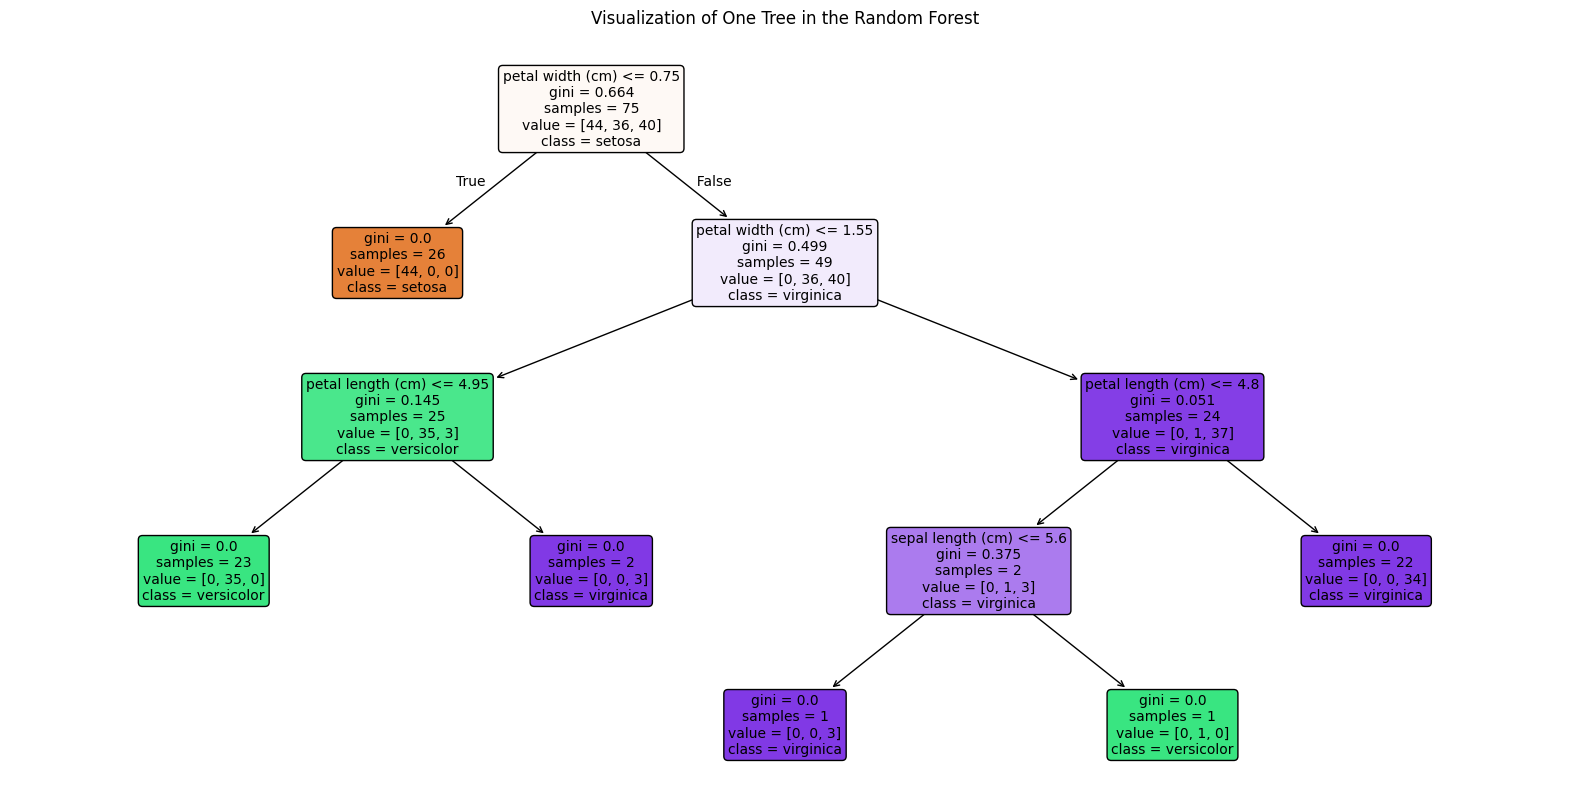

In [142]:
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[5], 
          feature_names=data.feature_names, 
          class_names=data.target_names, 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title("Visualization of One Tree in the Random Forest")
plt.show()

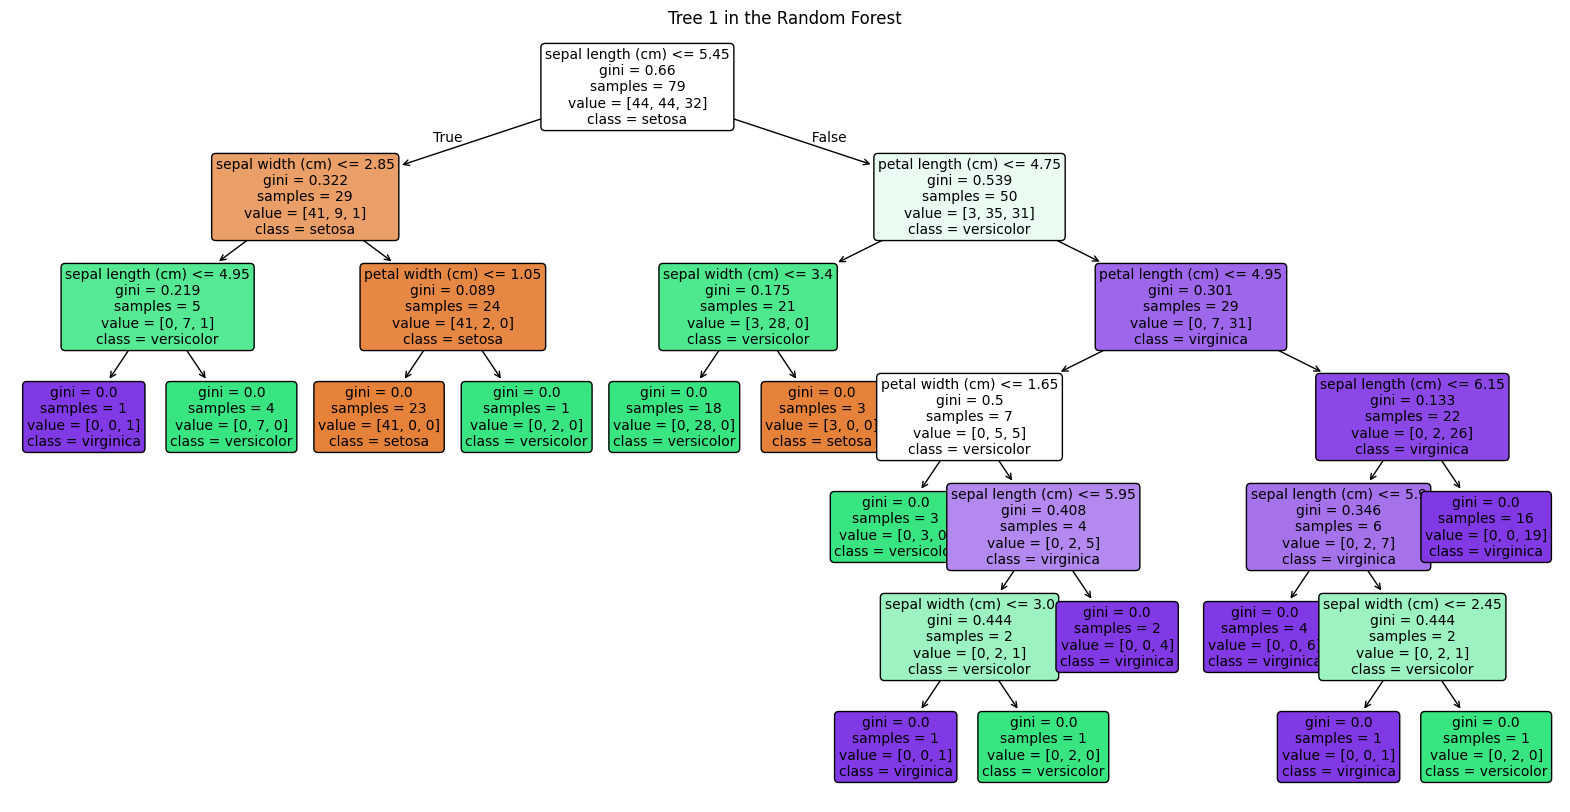

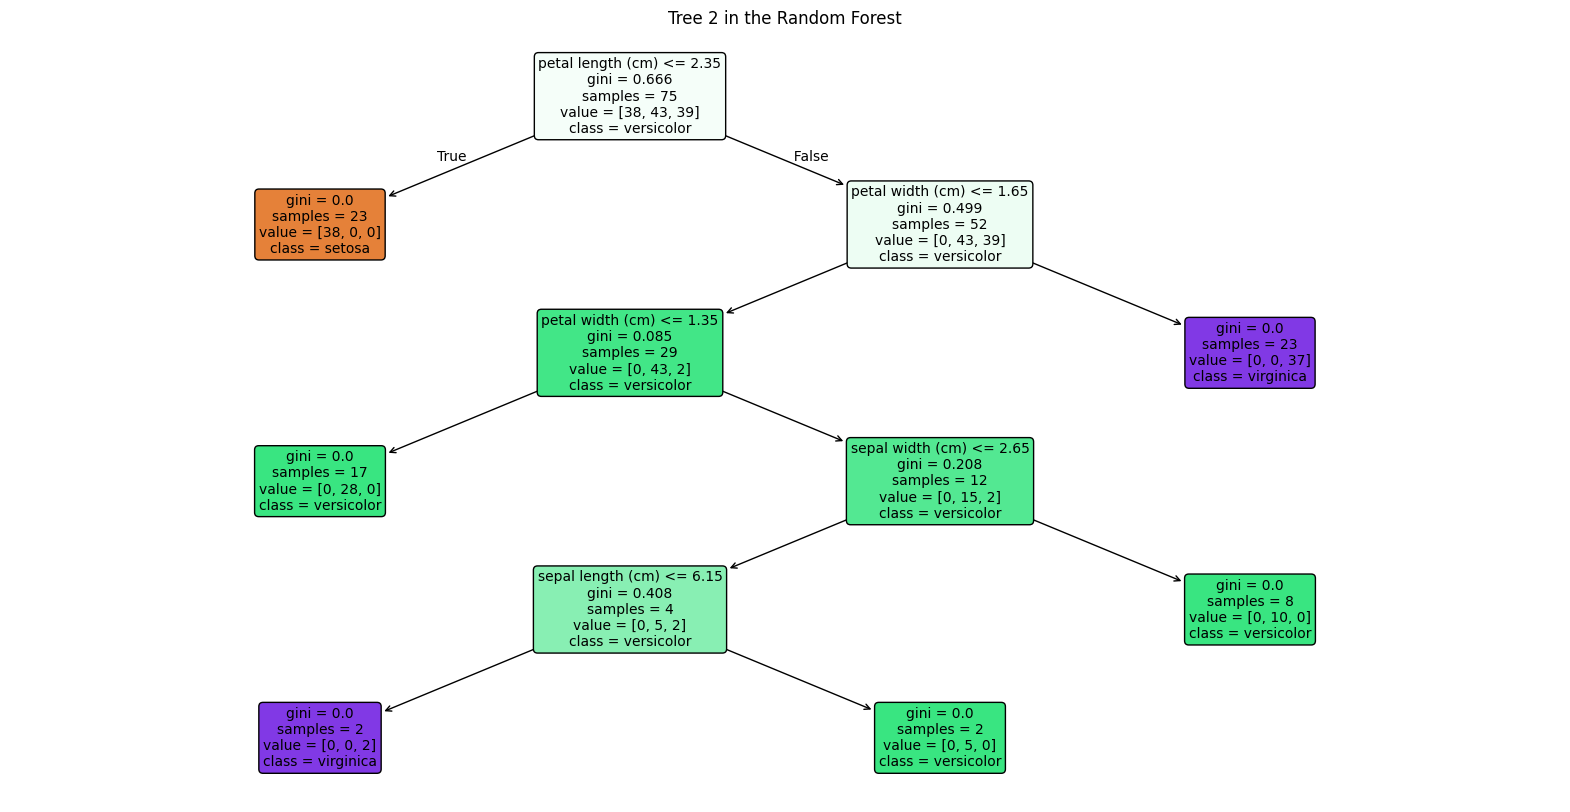

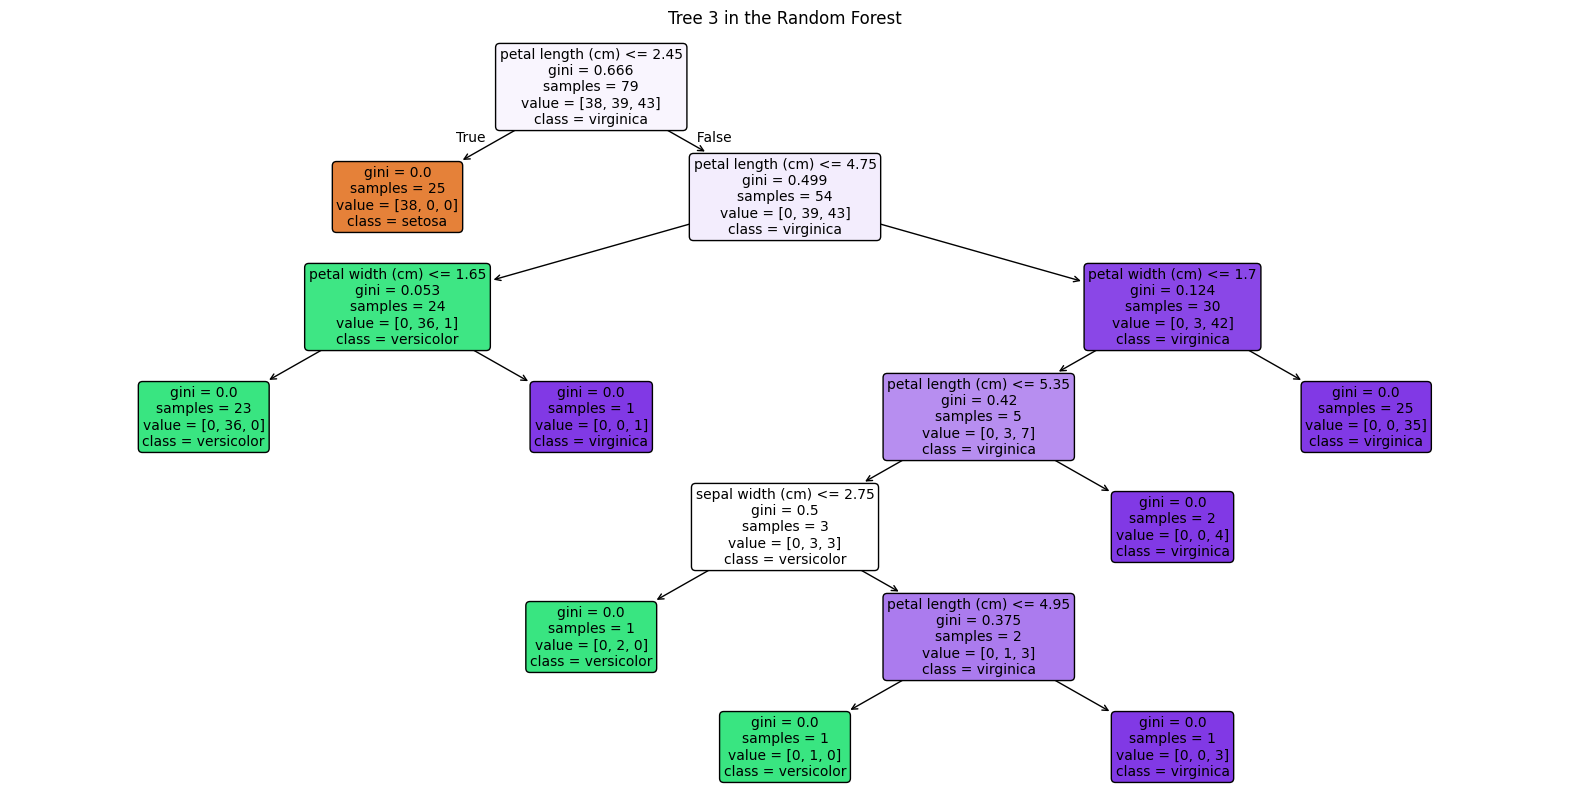

In [143]:
for i, tree in enumerate(rf_model.estimators_[:3]):
    plt.figure(figsize=(20, 10))
    plot_tree(tree,
              feature_names=data.feature_names,
              class_names=data.target_names,
              filled=True,
              rounded=True,
              fontsize=10)
    plt.title(f"Tree {i+1} in the Random Forest")
    plt.show()



In [144]:
joblib.dump(rf_model,"rf_model.pkl")

['rf_model.pkl']